In [125]:
import pandas as pd

In [126]:
df = pd.read_csv('adsclicking.csv')

In [127]:
df.head(10)

,Unnamed: 0,Age,Gender,Income,Location,Device,Interest_Category,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
0,0,56,Male,99003,Rural,Mobile,Sports,81.979324,7,0
1,1,46,Male,72395,Suburban,Tablet,Sports,59.854070,3,1
2,2,32,Male,59758,Suburban,Tablet,Sports,78.861989,2,0
3,3,60,Male,74312,Urban,Tablet,Technology,9.411579,6,0
4,4,25,Female,88670,Suburban,Mobile,Fashion,76.468409,9,0
5,5,38,Female,35434,Rural,Tablet,Technology,94.455936,10,1
6,6,56,Male,84047,Urban,Mobile,Sports,62.541211,4,1
7,7,36,Male,67775,Rural,Mobile,Travel,46.114033,3,1
8,8,40,Male,95769,Rural,Tablet,Technology,36.904075,9,1
9,9,28,Male,86677,Rural,Desktop,Fashion,78.922236,17,1


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2000 non-null   int64  
 1   Age                     2000 non-null   int64  
 2   Gender                  2000 non-null   object 
 3   Income                  2000 non-null   int64  
 4   Location                2000 non-null   object 
 5   Device                  2000 non-null   object 
 6   Interest_Category       2000 non-null   object 
 7   Time_Spent_on_Site      2000 non-null   float64
 8   Number_of_Pages_Viewed  2000 non-null   int64  
 9   Click                   2000 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


In [129]:
df.describe()

,Unnamed: 0,Age,Income,Time_Spent_on_Site,Number_of_Pages_Viewed,Click
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,41.31650,59652.978500,61.113314,10.321500,0.497000
std,577.494589,13.46566,23070.443915,32.518823,5.476507,0.500116
min,0.000000,18.00000,20112.000000,5.006075,1.000000,0.000000
25%,499.750000,30.00000,39873.750000,33.947635,6.000000,0.000000
50%,999.500000,42.00000,59050.500000,60.378894,10.000000,0.000000
75%,1499.250000,53.00000,79547.000000,88.321464,15.000000,1.000000
max,1999.000000,64.00000,99943.000000,119.840992,19.000000,1.000000


In [130]:

df = df.drop(columns=["Unnamed: 0", "Time_Spent_on_Site", "Number_of_Pages_Viewed"])



In [139]:
df.head()

,Age,Gender,Income,Location,Device,Interest_Category,Click,Age_Group,Income_Level
0,56,1,99003,0,1,1,0,2,2
1,46,1,72395,1,2,1,1,2,1
2,32,1,59758,1,2,1,0,1,1
3,60,1,74312,2,2,2,0,2,1
4,25,0,88670,1,1,0,0,0,2


In [140]:
#Data PreProcessing
from sklearn.preprocessing import LabelEncoder

In [141]:
for i in ["Gender","Location","Device", "Interest_Category"]:
    df[i] = LabelEncoder().fit_transform(df[i])
    
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 25, 40, 60, 100], labels=[0, 1, 2, 3])
df["Income_Level"] = pd.cut(df["Income"], bins=[0, 40000, 80000, 120000, 200000], labels=[0, 1, 2, 3])

In [142]:
X = df[["Age", "Income", "Gender", "Location", "Device", "Interest_Category"]]

/Users/nibrasaljubair/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


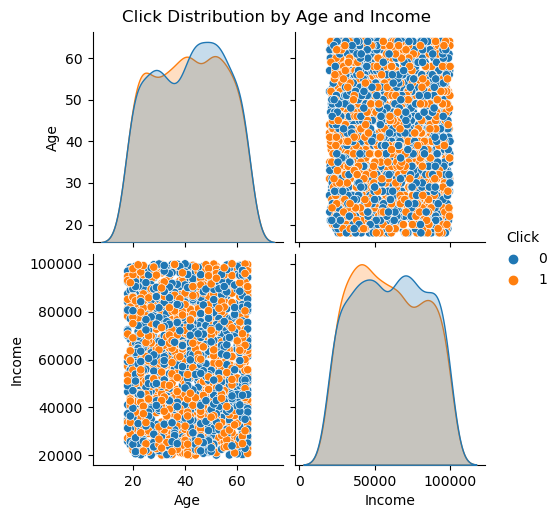

In [143]:
y = df["Click"]

import seaborn as sns
import matplotlib.pyplot as plt

viz_df = df.copy()
viz_df["Click"] = y  

sns.pairplot(viz_df, hue="Click", vars=["Age", "Income"])
plt.suptitle("Click Distribution by Age and Income", y=1.02)
plt.show()

In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [137]:
from sklearn.metrics import accuracy_score

# Predict on the test set and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print how accurate the model is on unseen (test) data
print(f"\n🔍 Model Accuracy: {accuracy:.2%}\n")


🔍 Model Accuracy: 53.75%



In [121]:
print(df["Click"].value_counts(normalize=True))


Click
0    0.503
1    0.497
Name: proportion, dtype: float64


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
